<a href="https://colab.research.google.com/github/DanishPasricha/Data-Visualization-Project/blob/second_branch/Danish_code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [50]:
from collections import Counter
columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv("adult.data", names= columnNames, sep=',').replace(' ?', np.nan)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


(-0.25, 4.51)

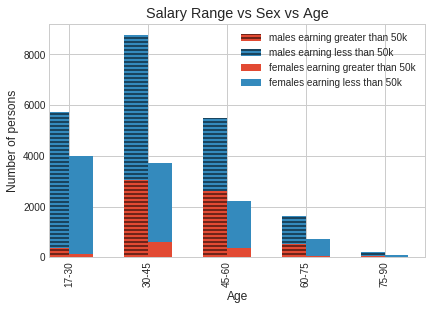

In [53]:
import matplotlib
matplotlib.style.use('seaborn-whitegrid') 
plt.close()
d = {}
for i, J in enumerate([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]):
    if df[columnNames[i]].isnull().sum().sum() != 0:
        if J == 1: df[columnNames[i]].fillna(df[columnNames[i]].mode()[0].strip(), inplace=True)
        else: df[columnNames[i]].fillna(df[columnNames[i]].mean(), inplace=True)
for age_range in ['17-30','30-45','45-60','60-75','75-90']:
    d[age_range] = {"F < 50,000" : 0,"F > 50,000" : 0,"M < 50,000" : 0,"M > 50,000" : 0}
for index, data in df.iterrows():
    temp = ''
    if data["age"] >=17 and data['age']<30: temp = ['17-30','30-45','45-60','60-75','75-90'][0]
    elif data['age'] >=30 and data['age']<45: temp = ['17-30','30-45','45-60','60-75','75-90'][1]
    elif data['age'] >=45 and data['age']<60: temp = ['17-30','30-45','45-60','60-75','75-90'][2]
    elif data['age'] >=60 and data['age']<75: temp = ['17-30','30-45','45-60','60-75','75-90'][3]
    else : temp = ['17-30','30-45','45-60','60-75','75-90'][4]
        
    if data["sex"].strip() == "Female":
        if data["income"].strip() == '<=50K': d[temp]["F < 50,000"]+=1
        else: d[temp]["F > 50,000"]+=1
    else:
        if data["income"].strip() == '<=50K': d[temp]["M < 50,000"]+=1
        else: d[temp]["M > 50,000"]+=1

F_less_than_50000 ,F_more_than_50000 ,M_less_than_50000 ,M_more_than_50000 = [],[],[],[]
for i in ['17-30','30-45','45-60','60-75','75-90']:
    F_less_than_50000.append(d[i]["F < 50,000"])
    F_more_than_50000.append(d[i]["F > 50,000"])
    M_less_than_50000.append(d[i]["M < 50,000"])
    M_more_than_50000.append(d[i]["M > 50,000"])    
dataframe_for_females = pd.DataFrame({"females earning greater than 50k":F_more_than_50000,"females earning less than 50k":F_less_than_50000,}, index=['17-30','30-45','45-60','60-75','75-90'])
dataframe_for_males = pd.DataFrame({"males earning greater than 50k":M_more_than_50000,"males earning less than 50k":M_less_than_50000,}, index=['17-30','30-45','45-60','60-75','75-90'])
fig, ax = plt.subplots()
plt.title("Salary Range vs Sex vs Age")
plt.ylabel("Number of persons")
plt.xlabel("Age")
dataframe_for_males.plot(kind="bar", stacked=True, width=0.3, ax=ax, position=1, hatch='---')
dataframe_for_females.plot(kind="bar", stacked=True, width=0.3, ax=ax, position=0)
ax.set_xlim(right=len(dataframe_for_females)-0.49)

(-0.55, 5.51)

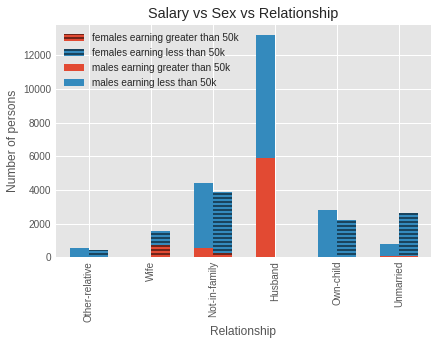

In [57]:
d = {}
race_valueset = set()
for i in set(list(df.relationship)):
    race_valueset.add(i.strip())
for i in race_valueset:
    d[i] = {"female_total" : 0,"F < 50,000" : 0,"F > 50,000" : 0,"male_total" : 0,"M < 50,000" : 0,"M > 50,000" : 0}
for index, j in df.iterrows():
    if j["sex"].strip() == "Female":
        if j["income"].strip() == '<=50K': d[j["relationship"].strip()]["F < 50,000"]+=1
        else: d[j["relationship"].strip()]["F > 50,000"]+=1
        d[j["relationship"].strip()]["female_total"]+=1
    else:
        if j["income"].strip() == '<=50K': d[j["relationship"].strip()]["M < 50,000"]+=1
        else: d[j["relationship"].strip()]["M > 50,000"]+=1
        d[j["relationship"].strip()]["male_total"]+=1
F_less_than_50000 ,F_more_than_50000 ,M_less_than_50000 ,M_more_than_50000 = [],[],[],[]
for i in race_valueset:
    F_less_than_50000.append(d[i]["F < 50,000"])
    F_more_than_50000.append(d[i]["F > 50,000"])
    M_less_than_50000.append(d[i]["M < 50,000"])
    M_more_than_50000.append(d[i]["M > 50,000"])
dataframe_for_females = pd.DataFrame({"females earning greater than 50k":F_more_than_50000,"females earning less than 50k":F_less_than_50000,}, index=race_valueset)
dataframe_for_males = pd.DataFrame({ "males earning greater than 50k":M_more_than_50000, "males earning less than 50k":M_less_than_50000, }, index=race_valueset)
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title("Salary vs Sex vs Relationship")
plt.ylabel("Number of persons")
plt.xlabel("Relationship")
dataframe_for_females.plot(kind="bar", stacked=True, width=0.3, ax=ax, position=0,hatch='---')
dataframe_for_males.plot(kind="bar", stacked=True, width=0.3, ax=ax, position=1)
ax.set_xlim(right=len(dataframe_for_females)-0.49)

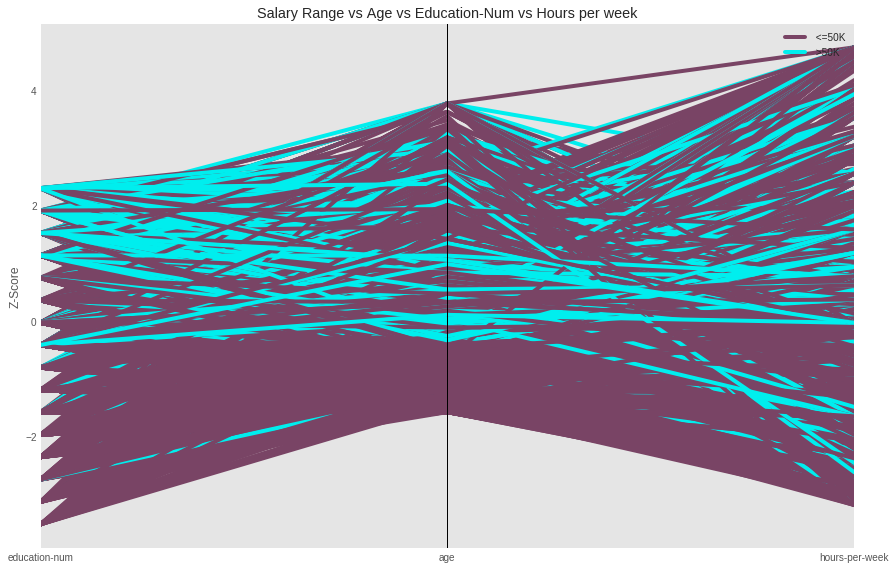

In [ ]:
df.columns
new_df = df[['education-num','age','hours-per-week']]
normalized_df=(new_df-new_df.mean())/new_df.std()
normalized_df.insert(2, "income", df['income'], True)
plt.figure(figsize=(13,9))
plt.title("Salary Range vs Age vs Education-Num vs Hours per week")
pd.plotting.parallel_coordinates(normalized_df,'income',color=('#794465', '#00eeee'))
plt.ylabel("Z-Score")
plt.show()

In [ ]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country","salary-range"]
df = pd.read_csv('adult.data', names=column_names)
df.head()
print("Salary ranges are :-",df["salary-range"].value_counts())
below_50K = df[df["salary-range"] == " <=50K"].sample(7841)
print("Shape for below 50,000 :-",below_50K.shape)
above_50K = df[df["salary-range"] == " >50K"]
print("Shape for above 50,000 :-",above_50K.shape)
df.head()
df = pd.concat([above_50K, below_50K])
a=df.copy()
df["salary-range"].replace({' <=50K':0," >50K":1 },inplace=True)
df["salary-range"].value_counts()
df["education"] = df["education"].astype('category')
df["marital-status"] = df["marital-status"].astype('category')
df["occupation"] = df["occupation"].astype('category')
df["relationship"] = df["relationship"].astype('category')
df["race"] = df["race"].astype('category')
df["sex"] = df["sex"].astype('category')
df["native-country"] = df["native-country"].astype('category')
df["workclass"] = df["workclass"].astype('category')
df_n = df.copy()
df.Js
print(df['hours-per-week'].value_counts())
df=pd.get_dummies(df,columns=["marital-status"])
df=pd.get_dummies(df,columns=["relationship"])
df=pd.get_dummies(df,columns=["race"])
df=pd.get_dummies(df,columns=["sex"])
df=pd.get_dummies(df,columns=["native-country"])
df=pd.get_dummies(df,columns=["workclass"])
import plotly
import plotly.express as px
import plotly.io as pio
import matplotlib
fig = px.scatter_matrix(a,dimensions = a[['education-num', "sex", 'age', 'relationship', 'salary-range']],width=1200, height=1050,color_discrete_sequence=['green'])
fig.update_traces(diagonal_visible=True)
fig.update_layout(title="Scatter Plot Matrix Representing Salary-Range , Sex , Age , Relationship , Education Number ")
fig.show()


Salary ranges are :-  <=50K    24720
 >50K      7841
Name: salary-range, dtype: int64
Shape for below 50,000 :- (7841, 15)
Shape for above 50,000 :- (7841, 15)
40    7038
50    1740
45    1059
60     911
35     542
      ... 
89       1
91       1
86       1
88       1
73       1
Name: hours-per-week, Length: 88, dtype: int64
